In [1]:
import numpy as np
import pandas as pd

from data_loading import Data
from monotonic_constraints import get_monotonicity_string
from tree_trainer import Model
from xgboost import plot_importance

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Analyse of Records


In [2]:
model_names = ['RF', 'RF_constrained', 'XGB', 'XGB_constrained']
model_name = 'XGB'

### Housing

In [3]:
data_name = 'housing'

log_file = f'{data_name}_{model_name}.csv'
df = pd.read_csv(log_file)
df.head(3)

,n_estimators,max_depth,tree_method,n_jobs,monotone_constraints,min_child_weight,gamma,eta,max_bin,random_state,MSE,MAE,RMSE,MAPE
0,609,9,hist,4,"(0,0,0,0,0,0,0)",7,8.9,0.08,461,3024,0.058174,0.131079,0.241193,0.749463
1,933,8,hist,4,"(0,0,0,0,0,0,0)",1,2.4,0.12,435,3024,0.052117,0.118601,0.228292,0.690324
2,86,8,hist,4,"(0,0,0,0,0,0,0)",3,7.6,0.07,337,3024,0.062136,0.133985,0.249272,0.769275


In [4]:
param_cols = ['n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'eta', 'max_bin']
metric_cols = ['MSE', 'MAE', 'RMSE', 'MAPE', 'AUC', 'AP', 'brier_score']
metric_cols = list(df.columns.intersection(metric_cols))

metric_cols

['MSE', 'MAE', 'RMSE', 'MAPE']

In [5]:
df_dict = {}
for mname in model_names:
    df = pd.read_csv(f'{data_name}_{mname}.csv')
    df_dict[mname] = df


In [6]:
summary_df = pd.DataFrame()

for mname in ['RF', 'XGB_constrained', 'XGB']:
    tmp = df_dict[mname][metric_cols].describe(percentiles=[])
    tmp = tmp.loc[tmp.index != 'count', :]
    tmp = tmp.rename(lambda s: f'{s}_{mname}', axis = 'columns')
    summary_df = summary_df.join(tmp, how='right')

summary_df

,MSE_RF,MAE_RF,RMSE_RF,MAPE_RF,MSE_XGB_constrained,MAE_XGB_constrained,RMSE_XGB_constrained,MAPE_XGB_constrained,MSE_XGB,MAE_XGB,RMSE_XGB,MAPE_XGB
mean,143317.768996,130.272844,285.683075,398.202969,0.067220,0.138335,0.257461,0.781006,0.060680,0.130962,0.244550,0.746265
std,205739.420451,143.510831,249.652182,637.481140,0.017482,0.024168,0.030718,0.132625,0.015647,0.022430,0.029733,0.120258
min,0.247474,0.305177,0.497467,2.263916,0.044990,0.096300,0.212108,0.528652,0.037274,0.084816,0.193064,0.476277
50%,50950.164906,87.018826,225.713103,103.278631,0.062722,0.134476,0.250444,0.770290,0.057239,0.127990,0.239247,0.734560
max,885453.326120,603.307103,940.985295,2700.905122,0.161652,0.246303,0.402060,1.434482,0.126704,0.235692,0.355955,1.106084


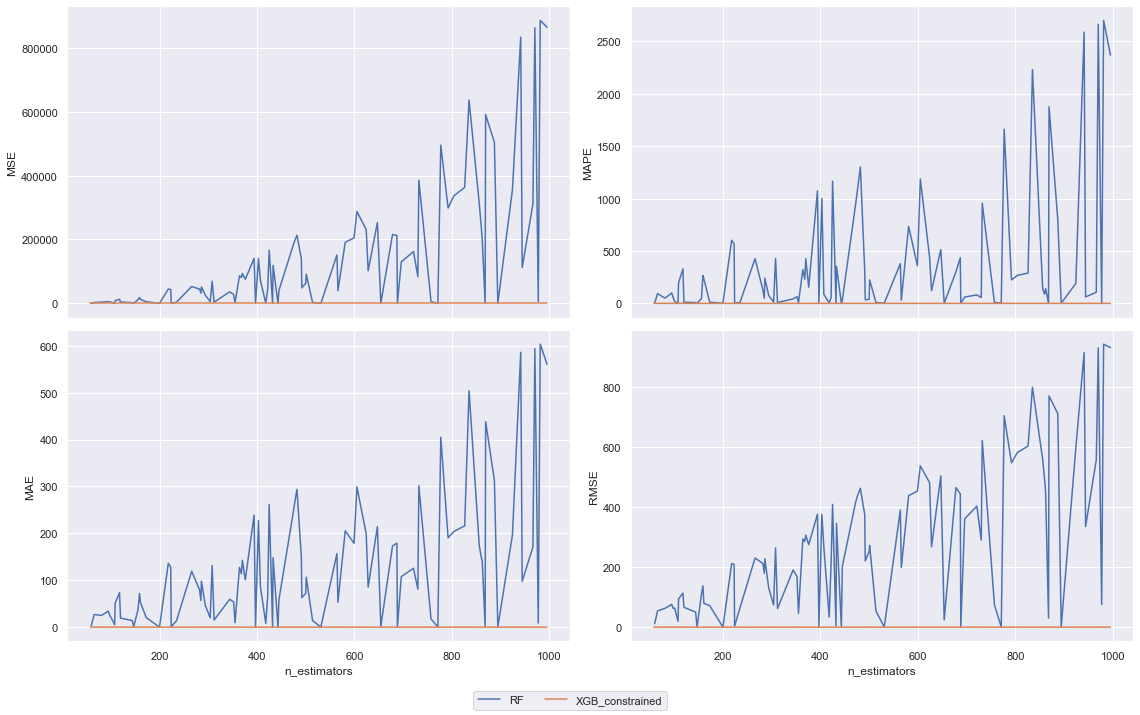

In [7]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16, 10), constrained_layout=False)
indices = [(0,0), (1,0), (1,1), (0,1)]
labels = ['RF', 'XGB_constrained']
# labels = ['XGB_constrained', 'XGB']

for i, col in enumerate(metric_cols):
    for label in labels:
        sns.lineplot(ax=axes[indices[i]], data=df_dict[label], x='n_estimators', y=col, sort=True, ci=None)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)   ##  Need to play with this number.

fig.legend(labels=labels, loc="lower center", ncol=len(labels));

### Adult

In [8]:
data_name = 'adult'

log_file = f'{data_name}_{model_name}.csv'
df = pd.read_csv(log_file)
df.head(3)

,n_estimators,max_depth,tree_method,n_jobs,monotone_constraints,min_child_weight,gamma,eta,max_bin,random_state,use_label_encoder,AUC,AP,brier_score
0,401,12,hist,4,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0)",9,1.6,0.12,349,3024,False,0.914287,0.794330,0.098030
1,332,12,hist,4,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0)",6,8.9,0.20,286,3024,False,0.916161,0.800330,0.095852
2,521,5,hist,4,"(0,0,0,0,0,0,0,0,0,0,0,0,0,0)",4,2.8,0.07,440,3024,False,0.918386,0.803611,0.094948


In [9]:
param_cols = ['n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'eta', 'max_bin']
metric_cols = ['MSE', 'MAE', 'RMSE', 'MAPE', 'AUC', 'AP', 'brier_score']
metric_cols = list(df.columns.intersection(metric_cols))

metric_cols

['AUC', 'AP', 'brier_score']

In [10]:
df_dict = {}
for mname in model_names:
    df = pd.read_csv(f'{data_name}_{mname}.csv')
    df_dict[mname] = df


In [11]:
summary_df = pd.DataFrame()

for mname in ['RF', 'XGB_constrained', 'XGB']:
    tmp = df_dict[mname][metric_cols].describe(percentiles=[])
    tmp = tmp.loc[tmp.index != 'count', :]
    tmp = tmp.rename(lambda s: f'{s}_{mname}', axis = 'columns')
    summary_df = summary_df.join(tmp, how='right')

summary_df

,AUC_RF,AP_RF,brier_score_RF,AUC_XGB_constrained,AP_XGB_constrained,brier_score_XGB_constrained,AUC_XGB,AP_XGB,brier_score_XGB
mean,0.839287,0.656136,0.133358,0.909809,0.786551,0.100257,0.914261,0.795614,0.097710
std,0.039259,0.070271,0.013800,0.004656,0.009851,0.004282,0.003847,0.008117,0.003594
min,0.776131,0.549121,0.108073,0.886624,0.733546,0.097773,0.898448,0.762727,0.094594
50%,0.845035,0.664724,0.137020,0.911379,0.789756,0.098782,0.915357,0.798192,0.096462
max,0.904895,0.778445,0.150716,0.913236,0.793942,0.123718,0.918861,0.805748,0.116152


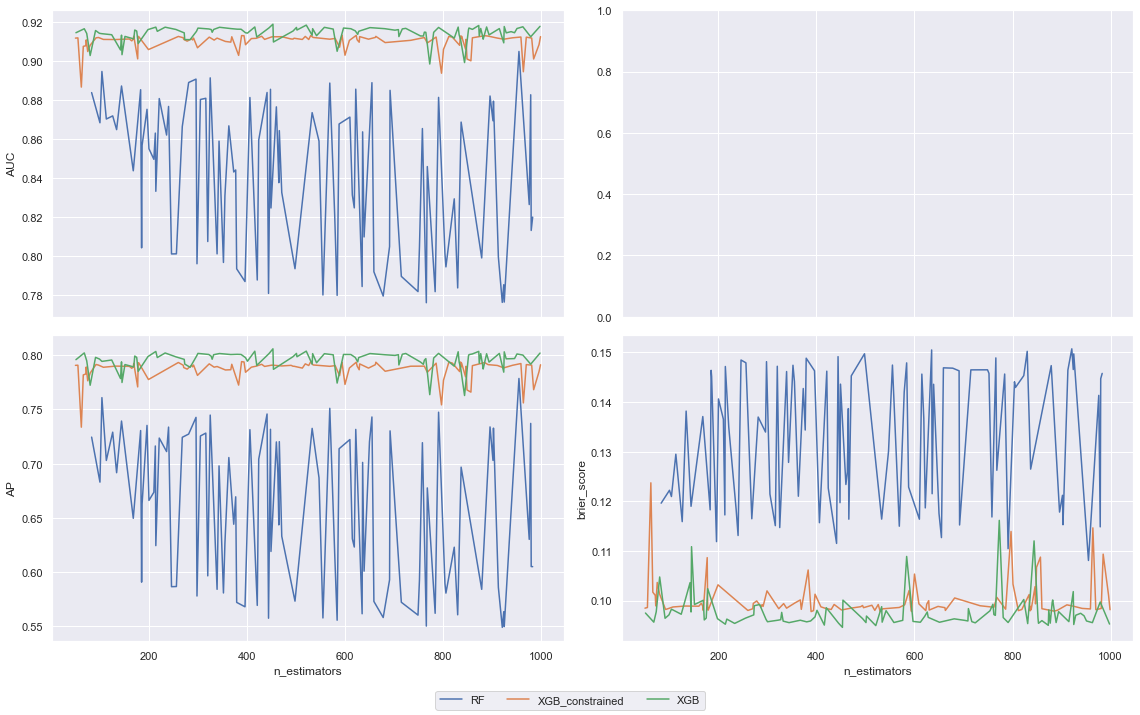

In [12]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16, 10), constrained_layout=False)
indices = [(0,0), (1,0), (1,1), (0,1)]
labels = ['RF', 'XGB_constrained', 'XGB']

for i, col in enumerate(metric_cols):
    for label in labels:
        sns.lineplot(ax=axes[indices[i]], data=df_dict[label], x='n_estimators', y=col, sort=True, ci=None)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)   ##  Need to play with this number.

fig.legend(labels=labels, loc="lower center", ncol=len(labels));

### Heart

In [13]:
data_name = 'heart'

log_file = f'{data_name}_{model_name}.csv'
df = pd.read_csv(log_file)
df.head(3)

,n_estimators,max_depth,tree_method,n_jobs,monotone_constraints,min_child_weight,gamma,eta,max_bin,random_state,use_label_encoder,AUC,AP,brier_score
0,689,6,hist,4,"(0,0,0,0,0,0,0,-0,0,0,0,0,0)",2,7.3,0.14,461,3024,False,0.861667,0.767276,0.178834
1,336,7,hist,4,"(0,0,0,0,0,0,0,-0,0,0,0,0,0)",2,0.5,0.23,475,3024,False,0.866667,0.764625,0.155287
2,480,13,hist,4,"(0,0,0,0,0,0,0,-0,0,0,0,0,0)",7,6.6,0.02,404,3024,False,0.885000,0.787946,0.174350


In [14]:
param_cols = ['n_estimators', 'max_depth', 'min_child_weight', 'gamma', 'eta', 'max_bin']
metric_cols = ['MSE', 'MAE', 'RMSE', 'MAPE', 'AUC', 'AP', 'brier_score']
metric_cols = list(df.columns.intersection(metric_cols))

metric_cols

['AUC', 'AP', 'brier_score']

In [15]:
df_dict = {}
for mname in model_names:
    df = pd.read_csv(f'{data_name}_{mname}.csv')
    df_dict[mname] = df


In [16]:
summary_df = pd.DataFrame()

for mname in ['RF', 'XGB_constrained', 'XGB']:
    tmp = df_dict[mname][metric_cols].describe(percentiles=[])
    tmp = tmp.loc[tmp.index != 'count', :]
    tmp = tmp.rename(lambda s: f'{s}_{mname}', axis = 'columns')
    summary_df = summary_df.join(tmp, how='right')

summary_df

,AUC_RF,AP_RF,brier_score_RF,AUC_XGB_constrained,AP_XGB_constrained,brier_score_XGB_constrained,AUC_XGB,AP_XGB,brier_score_XGB
mean,0.680521,0.566620,0.298785,0.885392,0.794612,0.158643,0.878092,0.785155,0.164064
std,0.094255,0.115800,0.043119,0.014130,0.023192,0.014279,0.018611,0.032505,0.014618
min,0.530417,0.395068,0.162329,0.855000,0.746121,0.132000,0.812500,0.613919,0.134965
50%,0.666250,0.551478,0.315024,0.885208,0.796648,0.157834,0.877708,0.782901,0.164226
max,0.875833,0.792892,0.342466,0.912083,0.845764,0.188008,0.918333,0.853740,0.191049


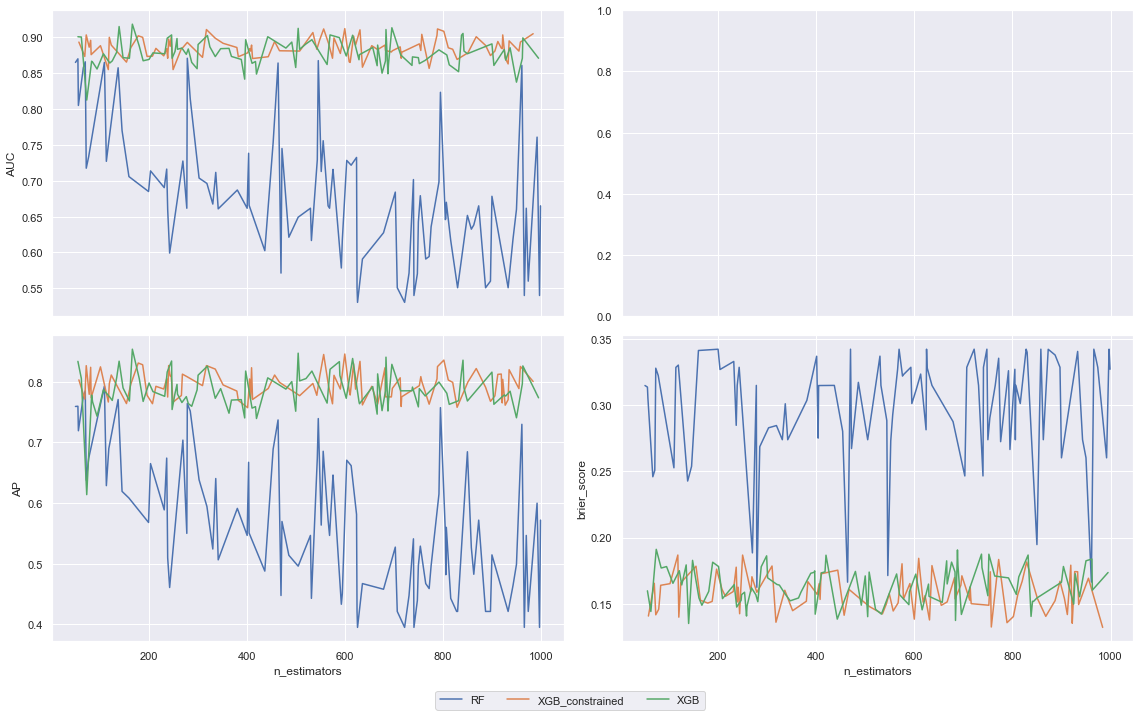

In [17]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16, 10), constrained_layout=False)
indices = [(0,0), (1,0), (1,1), (0,1)]
labels = ['RF', 'XGB_constrained', 'XGB']

for i, col in enumerate(metric_cols):
    for label in labels:
        sns.lineplot(ax=axes[indices[i]], data=df_dict[label], x='n_estimators', y=col, sort=True, ci=None)

fig.tight_layout() 
fig.subplots_adjust(bottom=0.1)   ##  Need to play with this number.

fig.legend(labels=labels, loc="lower center", ncol=len(labels));

## Test set

In [18]:
data_root = './Data/'
train_ratio = 0.7

f_im_dict = {
    'RF': {},
    'RF_constrained': {},
    'XGB': {},
    'XGB_constrained': {}
}

### Heart

In [19]:
data_name = 'heart'

if data_name == 'housing':
    model_type = 'regression'
else:
    model_type = 'classification'

X_train, Y_train, X_val, Y_val, feature_names = Data(data_name, data_root).split(train_ratio)
X_test, Y_test = Data(data_name, data_root, data_type='test').load()

**RF**

In [20]:
model_name = 'RF'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 279, 
    'max_depth': 3, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,0,0,0,0,0,0)', 
    'min_child_weight': 2, 
    'gamma': 0, 
    'eta': 0.15, 
    'max_bin': 352, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.8047619047619048, 'AP': 0.5707888549301954, 'brier_score': 0.18787300472263052}


**RF_constrained**

In [21]:
model_name = 'RF_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 432, 
    'max_depth': 8, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,-1,0,1,0,0,0)', 
    'min_child_weight': 6, 
    'gamma': 0.1, 
    'eta': 0.23, 
    'max_bin': 408, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.7904761904761904, 'AP': 0.5717994022820256, 'brier_score': 0.27038958330082985}


**XGB**

In [22]:
model_name = 'XGB'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 140, 
    'max_depth': 3, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,0,0,0,0,0,0)', 
    'min_child_weight': 9, 
    'gamma': 1, 
    'eta': 0.2, 
    'max_bin': 301, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.8613095238095239, 'AP': 0.658054646809991, 'brier_score': 0.16475439280611165}


**XGB_constrained**

In [23]:
model_name = 'XGB_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 984, 
    'max_depth': 12, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,-1,0,1,0,0,0)', 
    'min_child_weight': 9, 
    'gamma': 0.2, 
    'eta': 0.22, 
    'max_bin': 284, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.8535714285714285, 'AP': 0.6579937643891646, 'brier_score': 0.1654970473778435}


### Adult

In [24]:
data_name = 'adult'

if data_name == 'housing':
    model_type = 'regression'
else:
    model_type = 'classification'

X_train, Y_train, X_val, Y_val, feature_names = Data(data_name, data_root).split(train_ratio)
X_test, Y_test = Data(data_name, data_root, data_type='test').load()

**RF**

In [25]:
model_name = 'RF'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 955, 
    'max_depth': 10, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,0,0,0,0,0,0)', 
    'min_child_weight': 8, 
    'gamma': 0, 
    'eta': 0.04, 
    'max_bin': 352, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.9080864163806915, 'AP': 0.7893956415954227, 'brier_score': 0.10758605095485493}


**RF_constrained**

In [26]:
model_name = 'RF_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 327, 
    'max_depth': 12, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,1,0,0,0,0,0,1,0,0,0)', 
    'min_child_weight': 3, 
    'gamma': 0, 
    'eta': 0.15, 
    'max_bin': 332, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.9048120695284935, 'AP': 0.7784471203086308, 'brier_score': 0.11077182831846465}


**XGB**

In [27]:
model_name = 'XGB'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 453, 
    'max_depth': 4, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,0,0,0,0,0,0,0,0,0,0)', 
    'min_child_weight': 7, 
    'gamma': 1.1, 
    'eta': 0.1, 
    'max_bin': 468, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.9215540362838007, 'AP': 0.8161433831750635, 'brier_score': 0.09362658609215004}


**XGB_constrained**

In [28]:
model_name = 'XGB_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 389, 
    'max_depth': 4, 
    'tree_method': 'hist', 
    'n_jobs': 4, 
    'monotone_constraints': '(0,0,0,0,1,0,0,0,0,0,1,0,0,0)', 
    'min_child_weight': 3, 
    'gamma': 2.3, 
    'eta': 0.1, 
    'max_bin': 378, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'AUC': 0.9165627584734835, 'AP': 0.80573234477455, 'brier_score': 0.0964263493659724}


### Housing

In [29]:
data_name = 'housing'

if data_name == 'housing':
    model_type = 'regression'
else:
    model_type = 'classification'

X_train, Y_train, X_val, Y_val, feature_names = Data(data_name, data_root).split(train_ratio)
X_test, Y_test = Data(data_name, data_root, data_type='test').load()

**RF**

In [30]:
model_name = 'RF'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 688,
    'max_depth': 3,
    'tree_method': 'hist',
    'n_jobs': 4,
    'monotone_constraints': '(0,0,0,0,0,0,0)', 
    'min_child_weight': 5, 
    'gamma': 1.8, 
    'eta': 1, 
    'max_bin': 453, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'MSE': 0.24194617866737197, 'MAE': 0.30673395475746096, 'RMSE': 0.4918802482996974, 'MAPE': 2.3129037077862766}


**RF_constrained**

In [31]:
model_name = 'RF_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 145,
    'max_depth': 14,
    'tree_method': 'hist',
    'n_jobs': 4,
    'monotone_constraints': '(0,0,0,0,0,0,1)', 
    'min_child_weight': 1, 
    'gamma': 0, 
    'eta': 1, 
    'max_bin': 459, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'MSE': 0.09898276467298608, 'MAE': 0.16936611607110785, 'RMSE': 0.3146152645263514, 'MAPE': 1.0479448389249355}


**XGB**

In [32]:
model_name = 'XGB'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 362,
    'max_depth': 14,
    'tree_method': 'hist',
    'n_jobs': 4,
    'monotone_constraints': '(0,0,0,0,0,0,0)', 
    'min_child_weight': 5, 
    'gamma': 0, 
    'eta': 0.04, 
    'max_bin': 473, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'MSE': 0.03416147312217946, 'MAE': 0.08492387960879319, 'RMSE': 0.18482822598883392, 'MAPE': 0.4453120076076963}


**XGB_constrained**

In [33]:
model_name = 'XGB_constrained'
model = Model(model_name, model_type)

hyper_parameters = {
    'n_estimators': 245,
    'max_depth': 14,
    'tree_method': 'hist',
    'n_jobs': 4,
    'monotone_constraints': '(0,0,0,0,0,0,1)', 
    'min_child_weight': 9, 
    'gamma': 0.4, 
    'eta': 0.11, 
    'max_bin': 451, 
    'random_state': 3024
}

metrics, fitted_model = model.fit_eval(hyper_parameters, X_train, Y_train, X_test, Y_test)

print(metrics)

f_im_dict[model_name][data_name] = pd.DataFrame(zip(feature_names, fitted_model.feature_importances_), columns=['Feature_name', 'Importance'])

{'MSE': 0.039492123832051605, 'MAE': 0.10328181116781716, 'RMSE': 0.1987262535047939, 'MAPE': 0.5330097209872566}


### Feature importance

In [34]:
fig_root = './figs/'

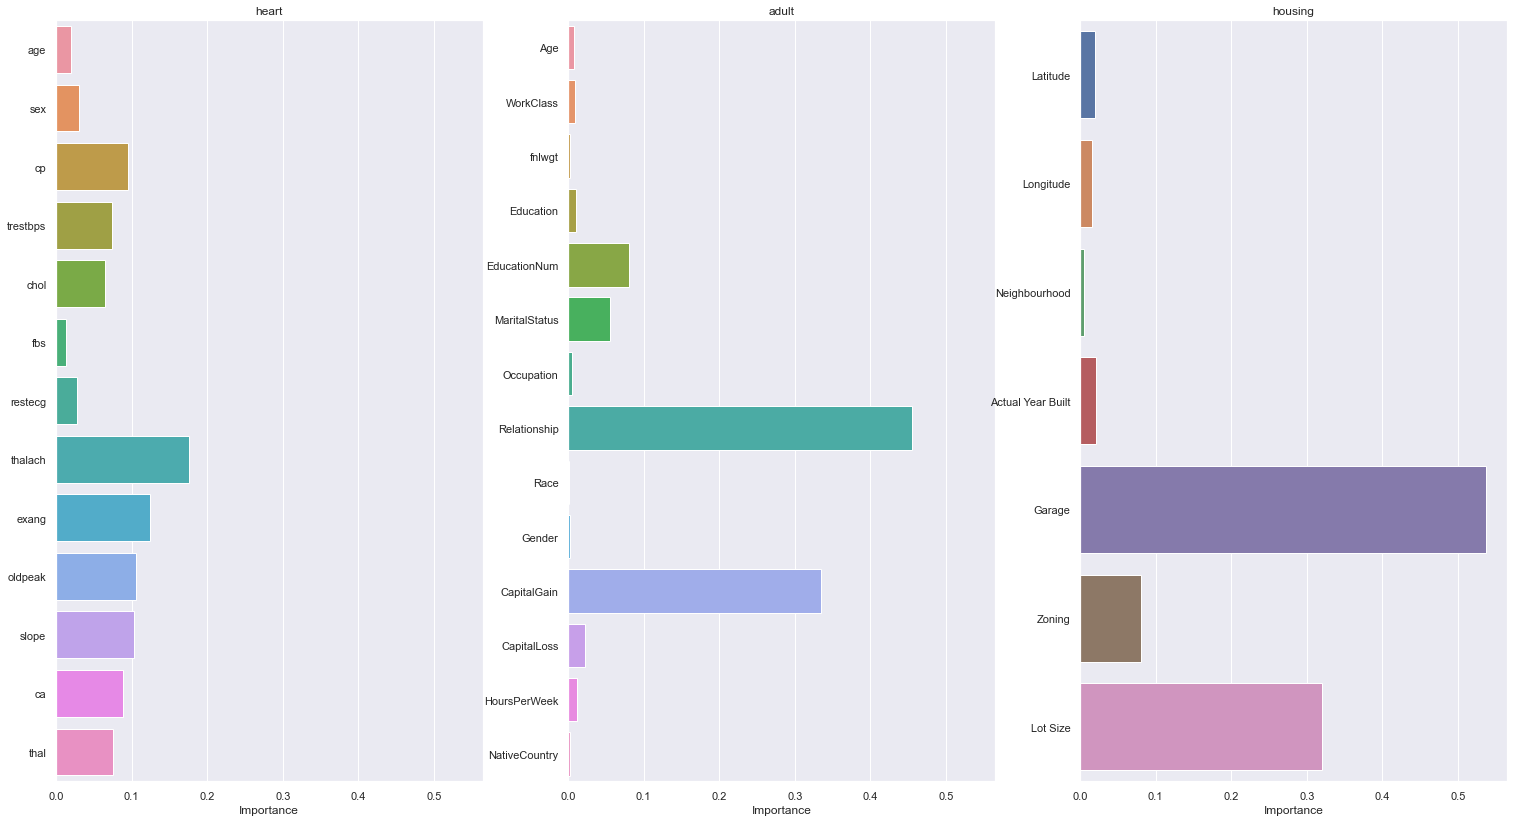

In [35]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(26, 14), constrained_layout=False)
model_fim = f_im_dict['RF']

for i, key in enumerate(model_fim.keys()):
    ax = sns.barplot(ax=axes[i], data=model_fim[key], x='Importance', y='Feature_name')
    ax.set(ylabel='', title=key)

plt.savefig(f'{fig_root}RF_feature_importance.png', dpi=600, bbox_inches="tight")

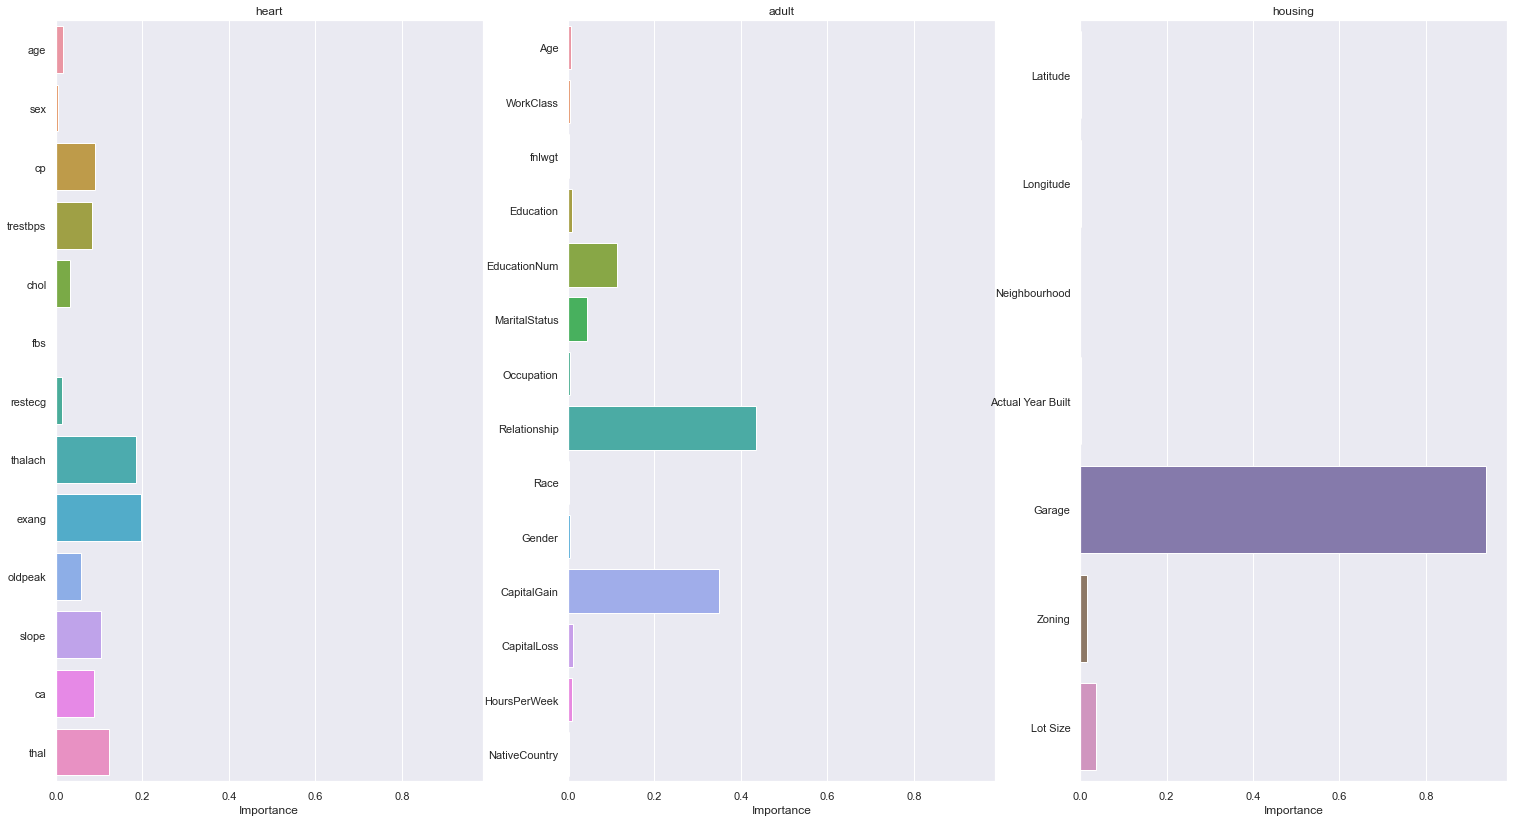

In [36]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(26, 14), constrained_layout=False)
model_fim = f_im_dict['RF_constrained']

for i, key in enumerate(model_fim.keys()):
    ax = sns.barplot(ax=axes[i], data=model_fim[key], x='Importance', y='Feature_name')
    ax.set(ylabel='', title=key)

plt.savefig(f'{fig_root}RF_constrained_feature_importance.png', dpi=600, bbox_inches="tight")

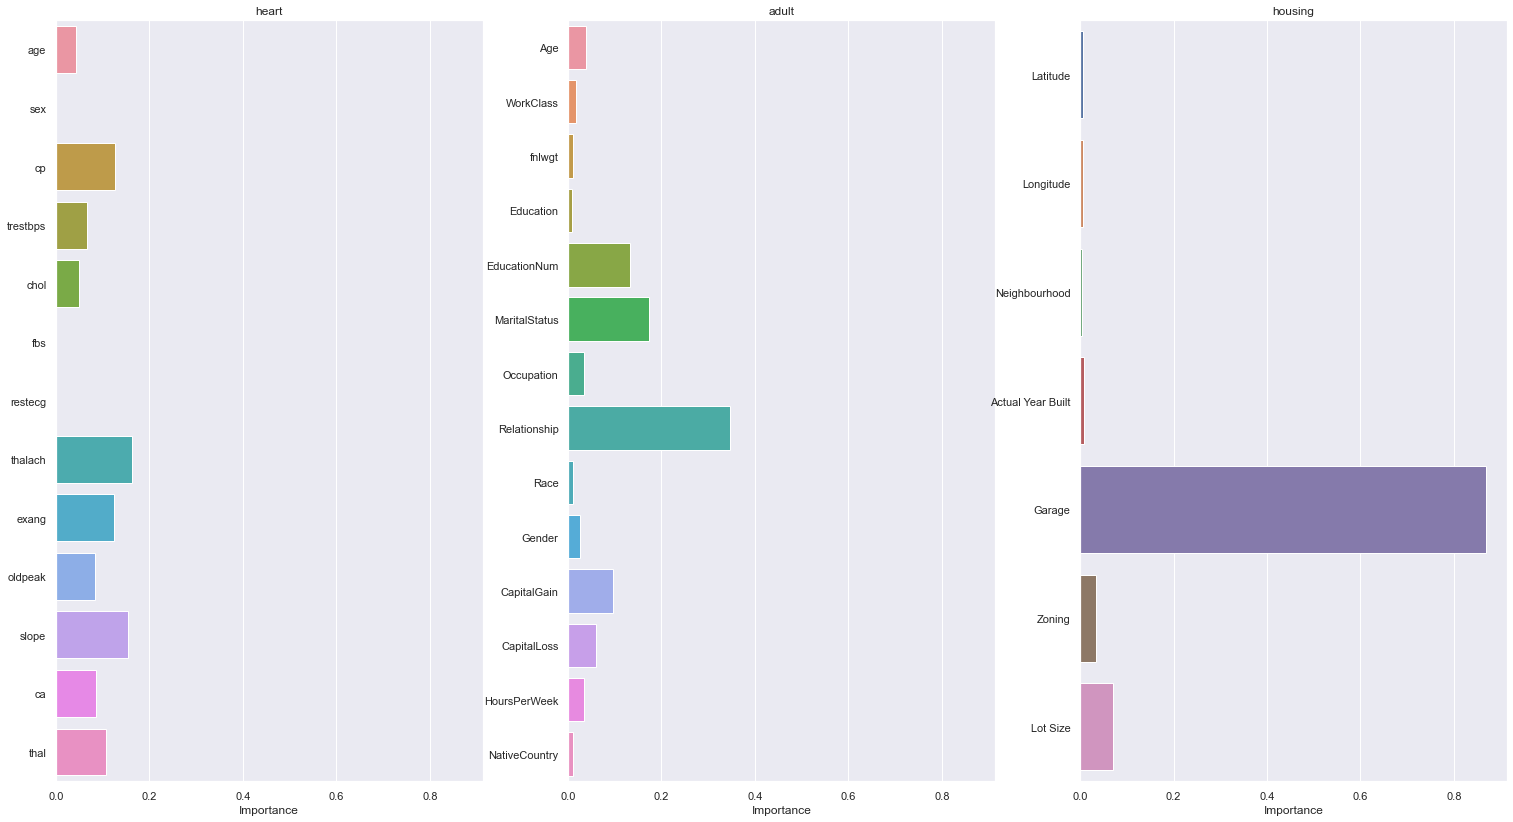

In [37]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(26, 14), constrained_layout=False)
model_fim = f_im_dict['XGB']

for i, key in enumerate(model_fim.keys()):
    ax = sns.barplot(ax=axes[i], data=model_fim[key], x='Importance', y='Feature_name')
    ax.set(ylabel='', title=key)

plt.savefig(f'{fig_root}XGB_feature_importance.png', dpi=600, bbox_inches="tight")

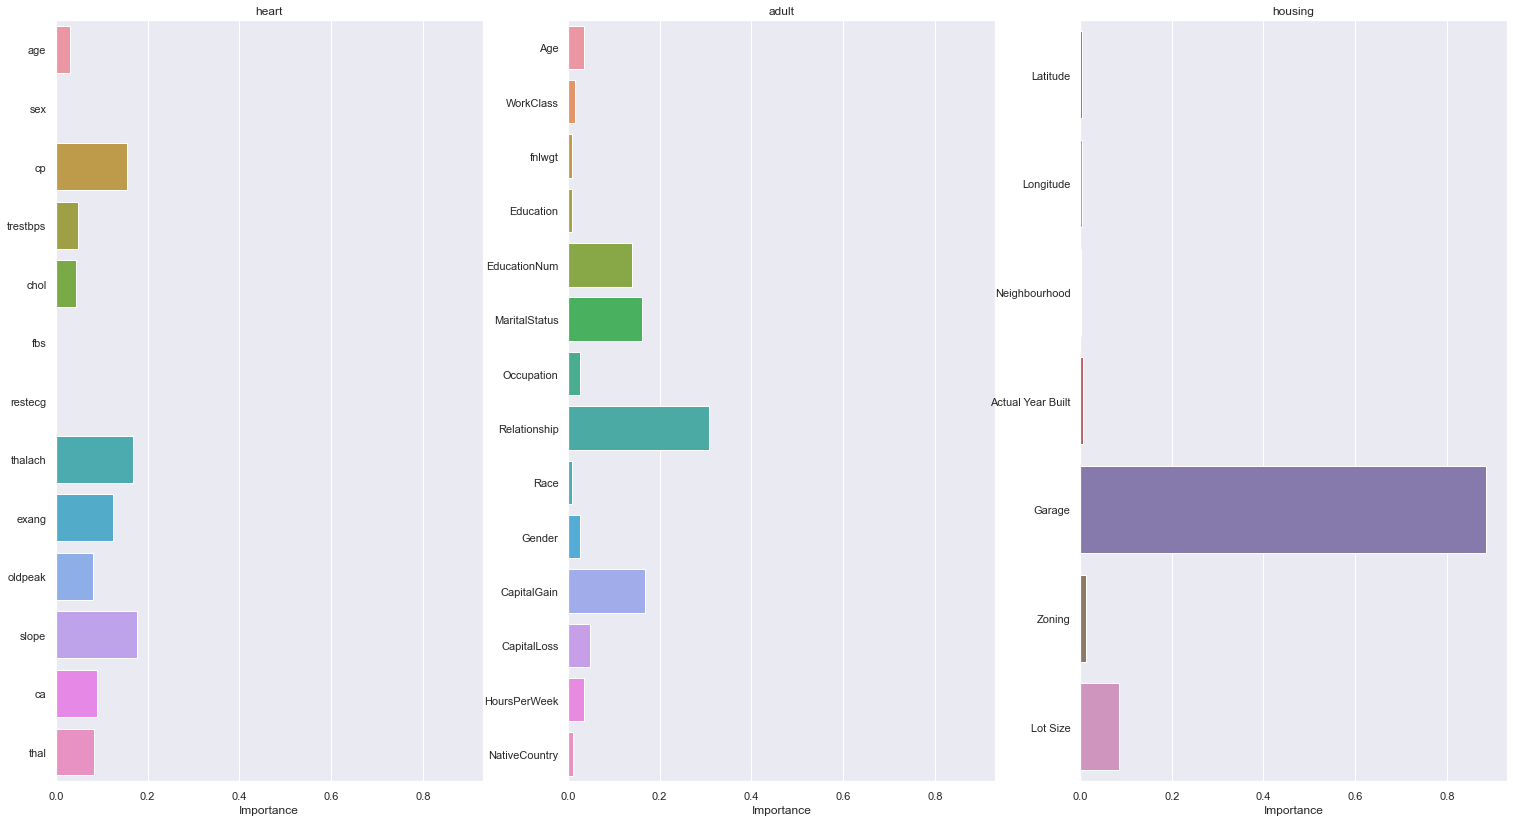

In [38]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(26, 14), constrained_layout=False)
model_fim = f_im_dict['XGB_constrained']

for i, key in enumerate(model_fim.keys()):
    ax = sns.barplot(ax=axes[i], data=model_fim[key], x='Importance', y='Feature_name')
    ax.set(ylabel='', title=key)

plt.savefig(f'{fig_root}XGB_constrained_feature_importance.png', dpi=600, bbox_inches="tight")